In [1]:
import pandas as pd
import numpy as np
import seaborn as sn
train_data = pd.read_csv("data/Train.csv")
tags = pd.read_csv("data/Tags.csv")
test_data = pd.read_csv("data/Test.csv")

In [2]:
train_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14004 entries, 0 to 14003
Data columns (total 31 columns):
 #   Column                                        Non-Null Count  Dtype 
---  ------                                        --------------  ----- 
 0   id                                            14004 non-null  int64 
 1   ABSTRACT                                      14004 non-null  object
 2   Computer Science                              14004 non-null  int64 
 3   Mathematics                                   14004 non-null  int64 
 4   Physics                                       14004 non-null  int64 
 5   Statistics                                    14004 non-null  int64 
 6   Analysis of PDEs                              14004 non-null  int64 
 7   Applications                                  14004 non-null  int64 
 8   Artificial Intelligence                       14004 non-null  int64 
 9   Astrophysics of Galaxies                      14004 non-null  int64 
 10

In [3]:
list(train_data['ABSTRACT'])[0]

'a ever-growing datasets inside observational astronomy have challenged scientists inside many aspects, including an efficient and interactive data exploration and visualization. many tools have been developed to confront this challenge. however, they usually focus on displaying a actual images or focus on visualizing patterns within catalogs inside the predefined way. inside this paper we introduce vizic, the python visualization library that builds a connection between images and catalogs through an interactive map of a sky region. vizic visualizes catalog data over the custom background canvas with the help of a shape, size and orientation of each object inside a catalog. a displayed objects inside a map are highly interactive and customizable comparing to those inside a images. these objects should be filtered by or colored by their properties, such as redshift and magnitude. they also should be sub-selected with the help of the lasso-like tool considering further analysis with the

In [4]:
# Checking no of tags for each abstract
temp = train_data.copy()
temp = temp.drop(columns=['id','ABSTRACT'])
no_tags = temp.sum(axis=1)
temp['tot_tags'] = no_tags

In [5]:
temp['tot_tags'].value_counts()

2    9200
3    2935
4    1473
5     321
6      70
7       5
Name: tot_tags, dtype: int64

In [6]:
import nltk
from nltk.corpus import stopwords
# nltk.download('stopwords')
stop=set(stopwords.words('english'))

In [7]:
tag_columns = list(set(list(train_data)) - set(['id', 'ABSTRACT', 'Computer Science', 'Mathematics', 'Physics', 'Statistics']))
import string

train_data['ABSTRACT'] = train_data['ABSTRACT'].str.lower()
test_data['ABSTRACT'] = test_data['ABSTRACT'].str.lower()
train_data['ABSTRACT'] = train_data['ABSTRACT'].str.translate(str.maketrans('', '', string.punctuation))
test_data['ABSTRACT'] = test_data['ABSTRACT'].str.translate(str.maketrans('', '', string.punctuation))


Total characters per abstract
Computation and Language




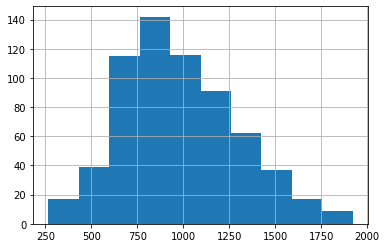

Superconductivity




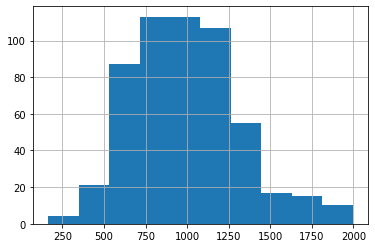

Cosmology and Nongalactic Astrophysics




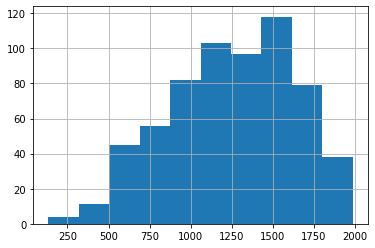

Number Theory




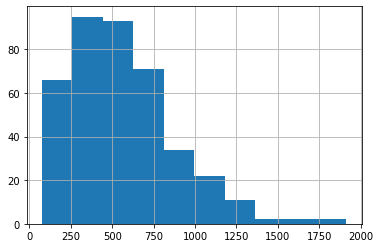

Analysis of PDEs




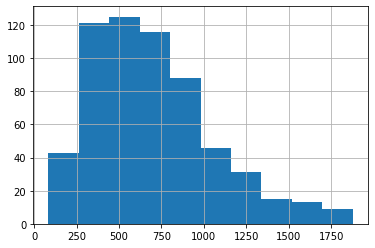

Strongly Correlated Electrons




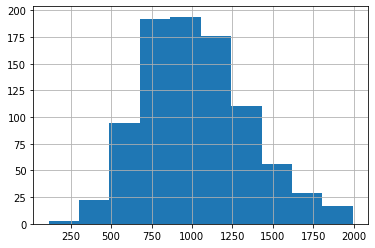

Statistics Theory




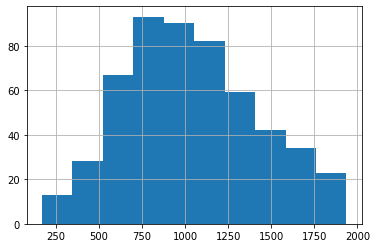

Fluid Dynamics




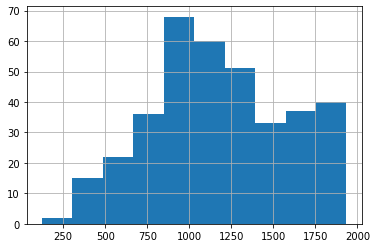

Instrumentation and Methods for Astrophysics




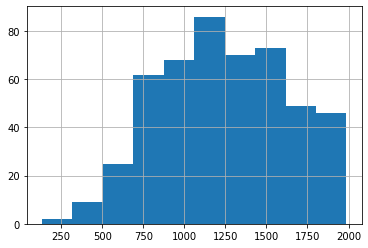

Social and Information Networks




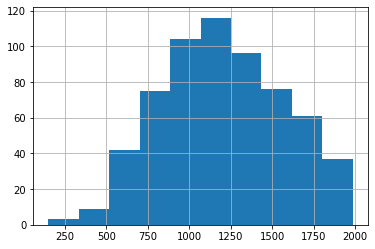

Artificial Intelligence




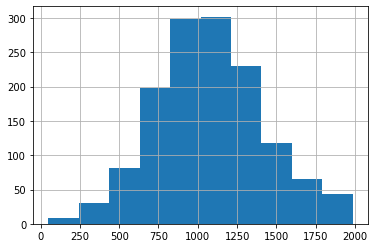

Computer Vision and Pattern Recognition




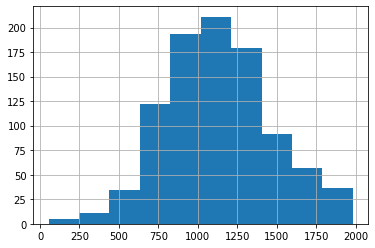

Machine Learning




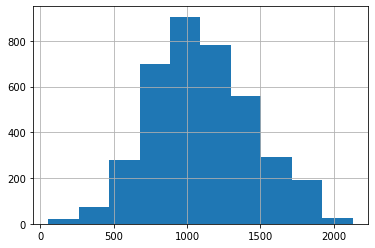

Methodology




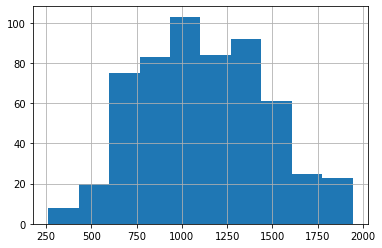

Robotics




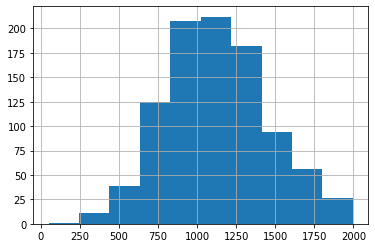

Applications




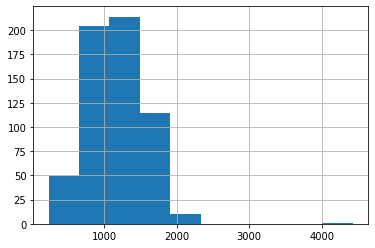

Information Theory




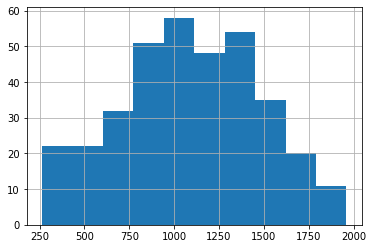

Earth and Planetary Astrophysics




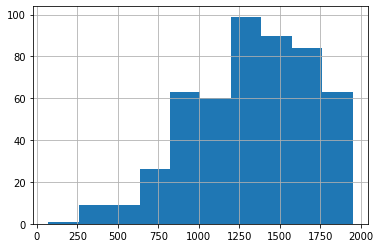

Materials Science




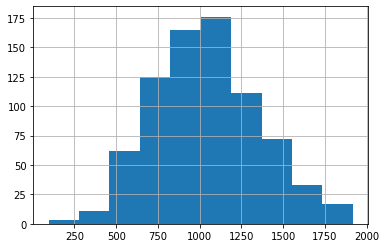

Optimization and Control




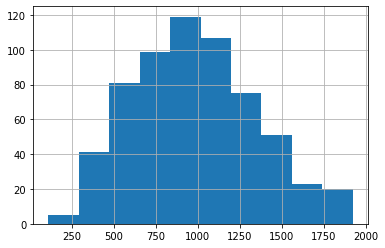

Astrophysics of Galaxies




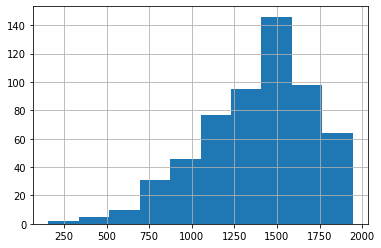

Data Structures and Algorithms




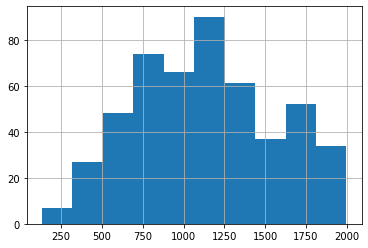

Systems and Control




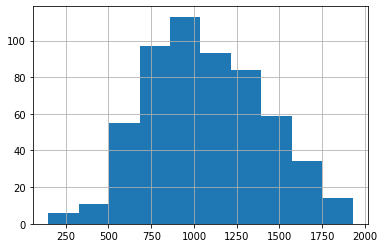

Representation Theory




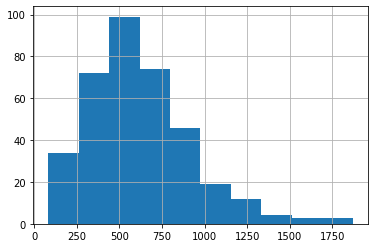

Differential Geometry




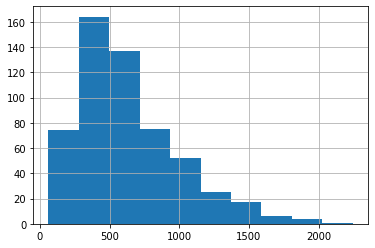

Total words per abstract
Computation and Language




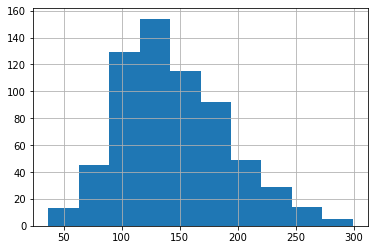

Superconductivity




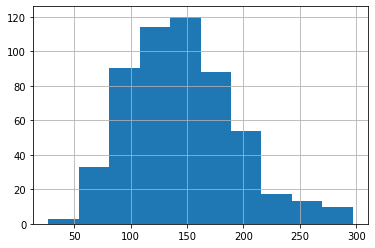

Cosmology and Nongalactic Astrophysics




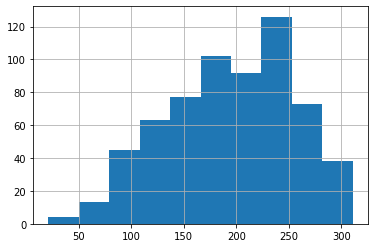

Number Theory




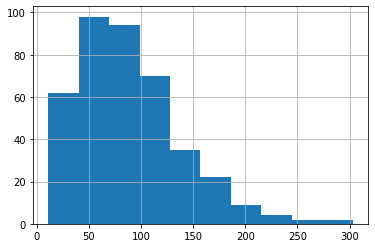

Analysis of PDEs




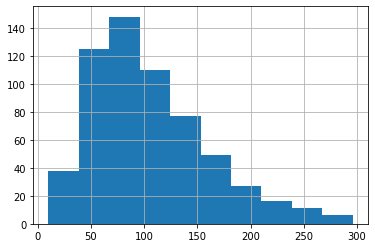

Strongly Correlated Electrons




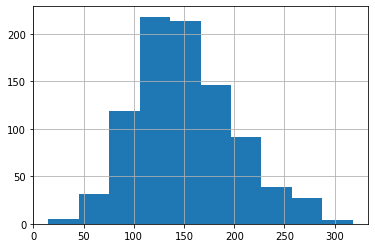

Statistics Theory




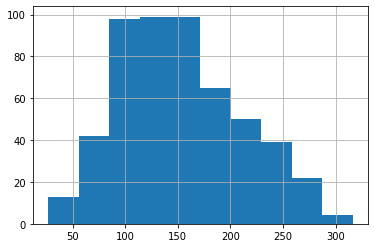

Fluid Dynamics




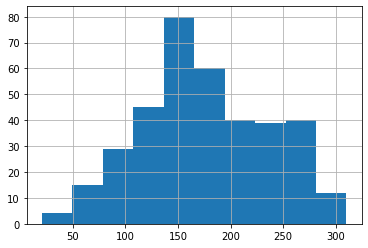

Instrumentation and Methods for Astrophysics




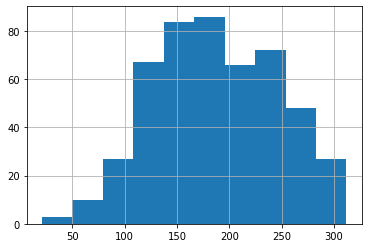

Social and Information Networks




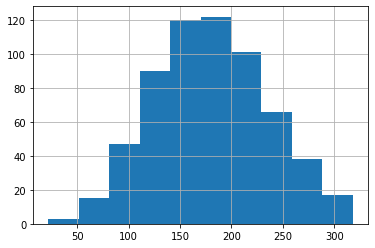

Artificial Intelligence




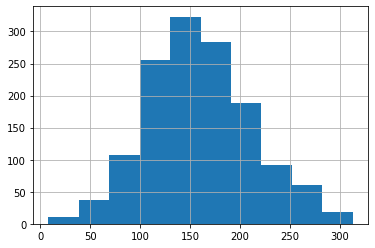

Computer Vision and Pattern Recognition




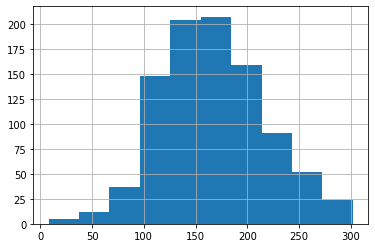

Machine Learning




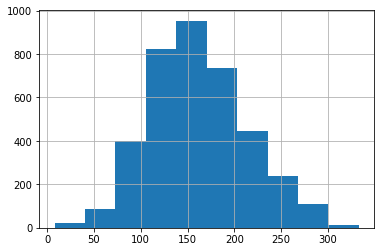

Methodology




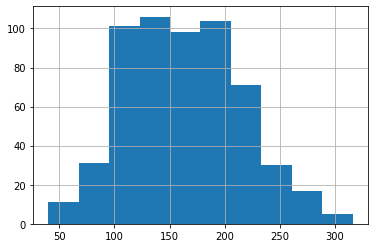

Robotics




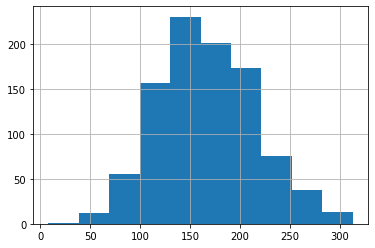

Applications




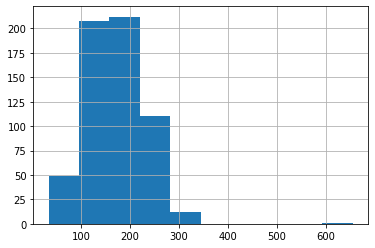

Information Theory




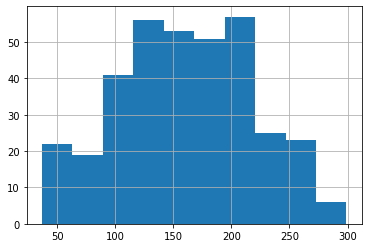

Earth and Planetary Astrophysics




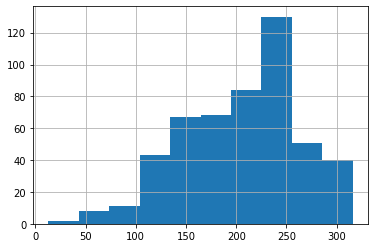

Materials Science




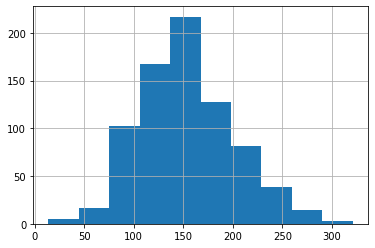

Optimization and Control




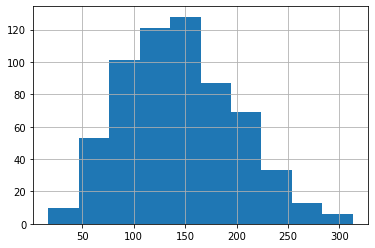

Astrophysics of Galaxies




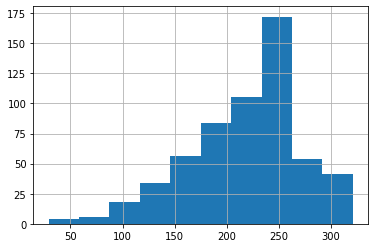

Data Structures and Algorithms




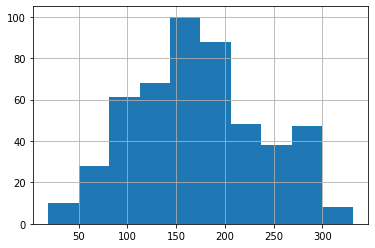

Systems and Control




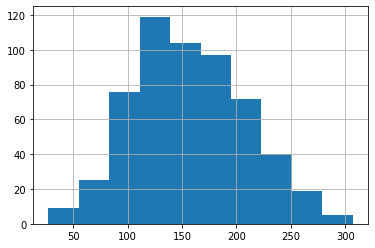

Representation Theory




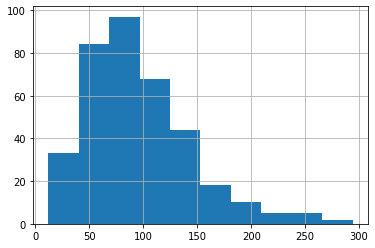

Differential Geometry




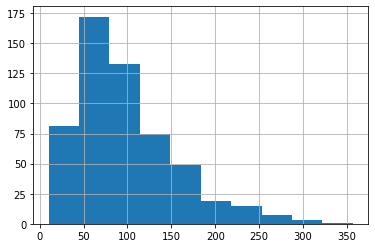

Mean word length
Computation and Language




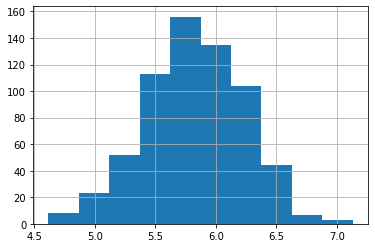

Superconductivity




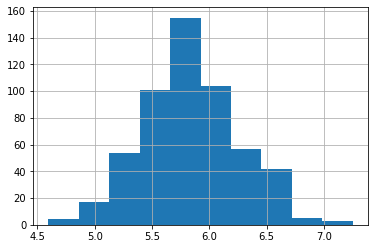

Cosmology and Nongalactic Astrophysics




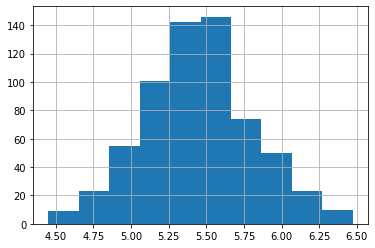

Number Theory




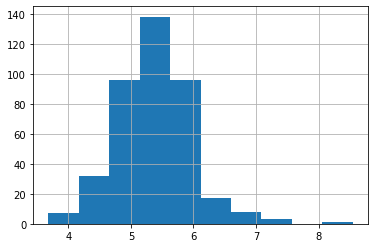

Analysis of PDEs




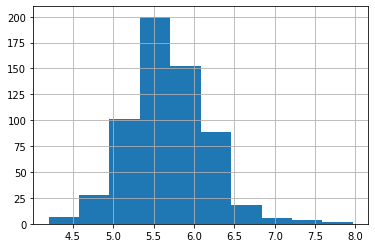

Strongly Correlated Electrons




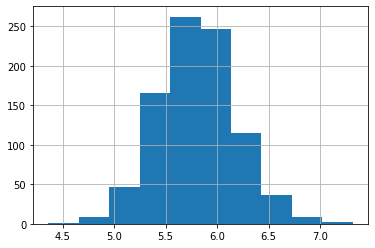

Statistics Theory




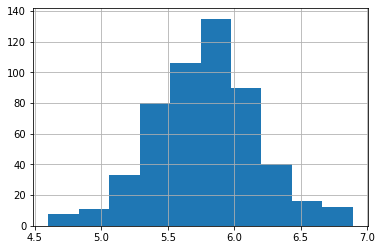

Fluid Dynamics




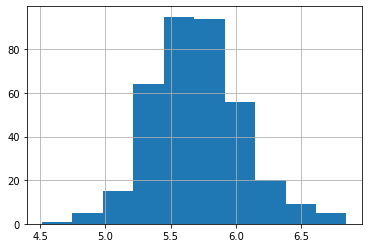

Instrumentation and Methods for Astrophysics




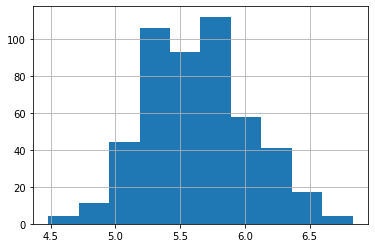

Social and Information Networks




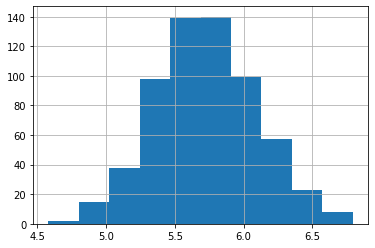

Artificial Intelligence




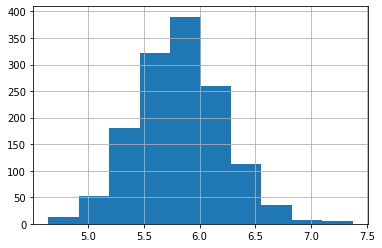

Computer Vision and Pattern Recognition




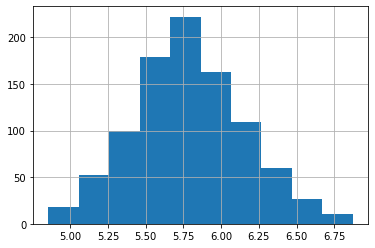

Machine Learning




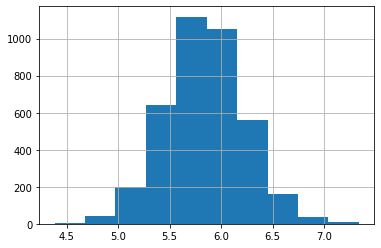

Methodology




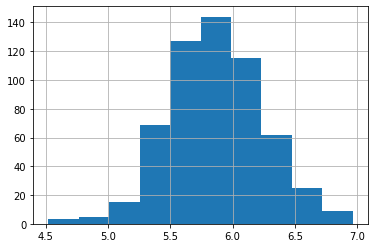

Robotics




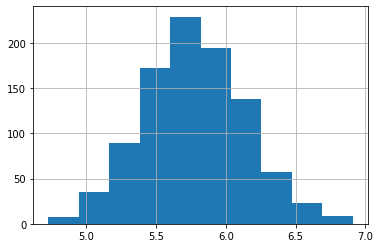

Applications




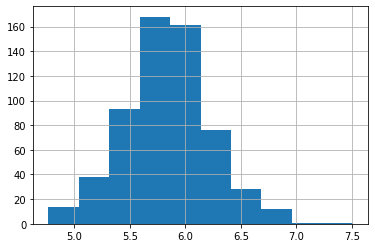

Information Theory




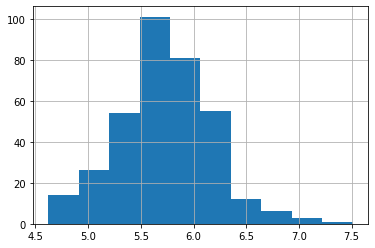

Earth and Planetary Astrophysics




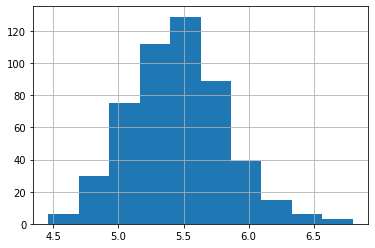

Materials Science




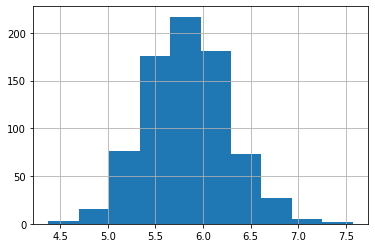

Optimization and Control




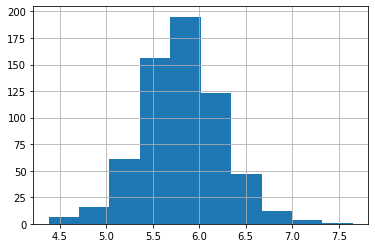

Astrophysics of Galaxies




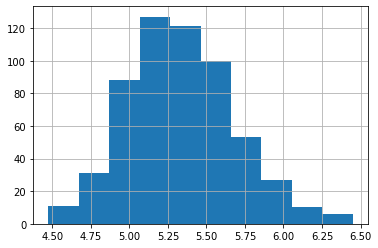

Data Structures and Algorithms




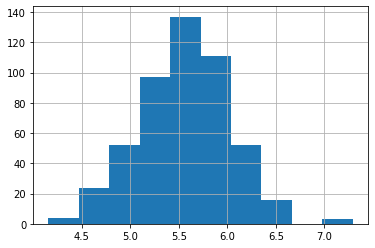

Systems and Control




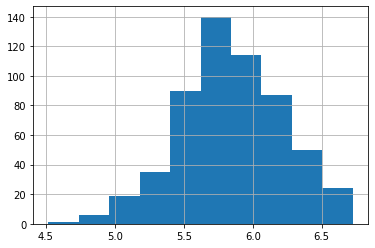

Representation Theory




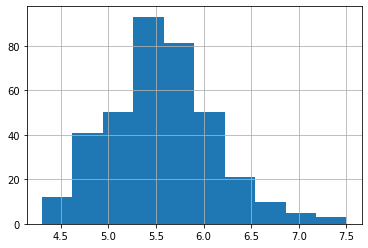

Differential Geometry




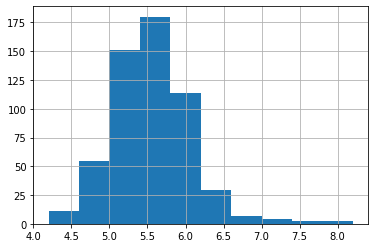

Top ngrams
Computation and Language




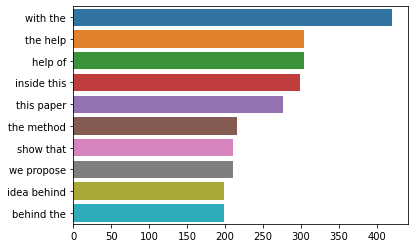

Superconductivity




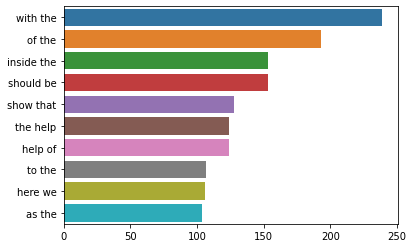

Cosmology and Nongalactic Astrophysics




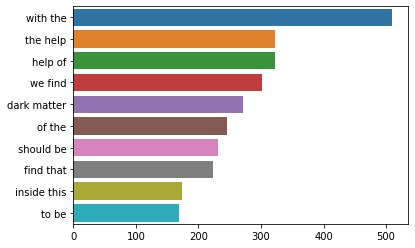

Number Theory




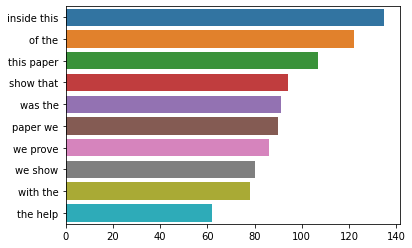

Analysis of PDEs




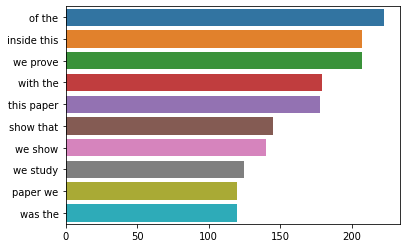

Strongly Correlated Electrons




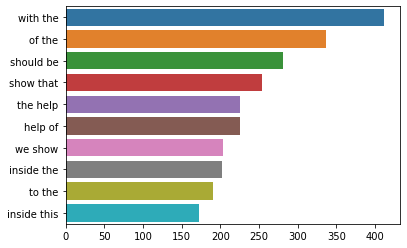

Statistics Theory




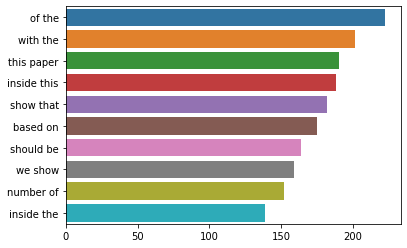

Fluid Dynamics




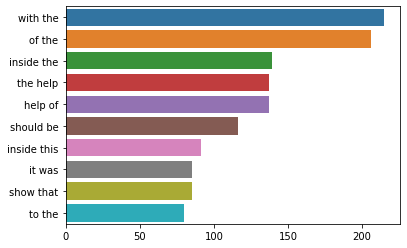

Instrumentation and Methods for Astrophysics




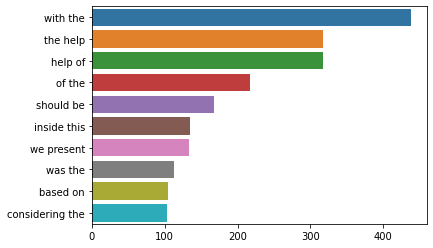

Social and Information Networks




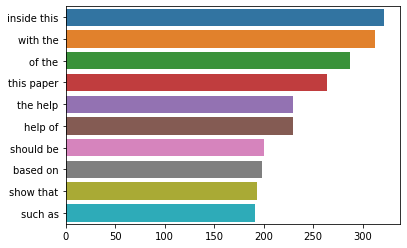

Artificial Intelligence




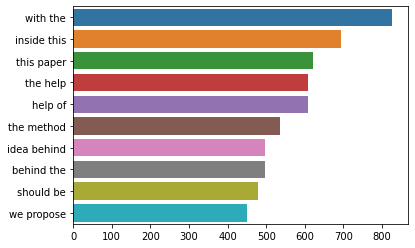

Computer Vision and Pattern Recognition




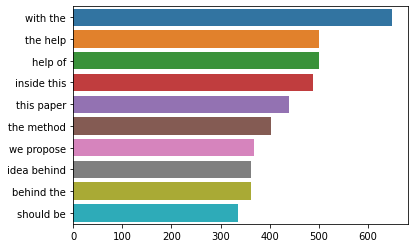

Machine Learning




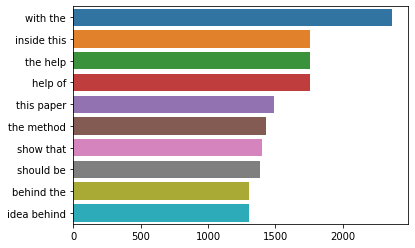

Methodology




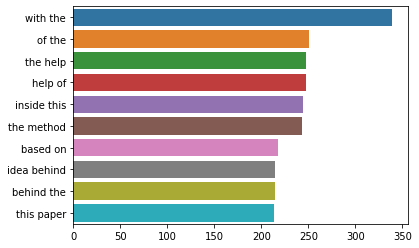

Robotics




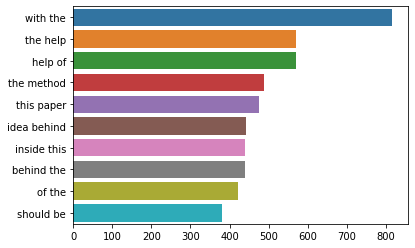

Applications




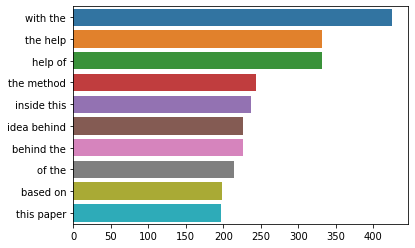

Information Theory




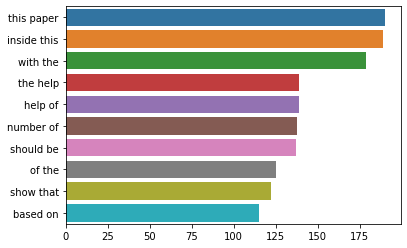

Earth and Planetary Astrophysics




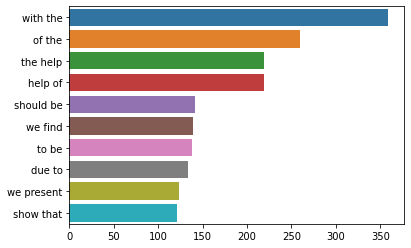

Materials Science




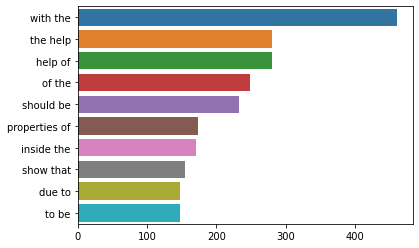

Optimization and Control




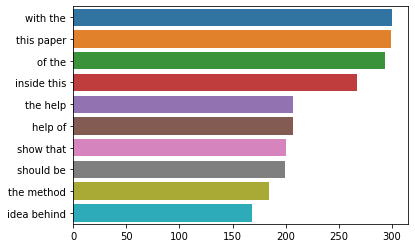

Astrophysics of Galaxies




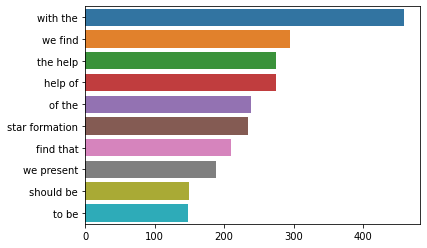

Data Structures and Algorithms




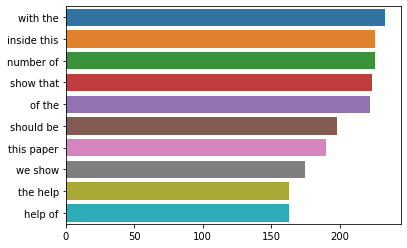

Systems and Control




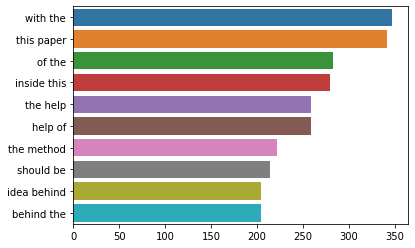

Representation Theory




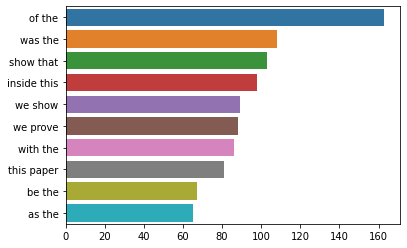

Differential Geometry




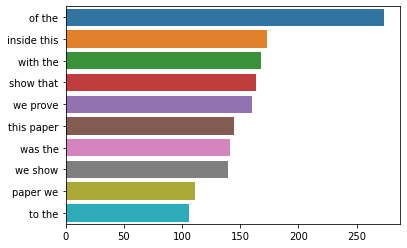

Word Cloud
Computation and Language




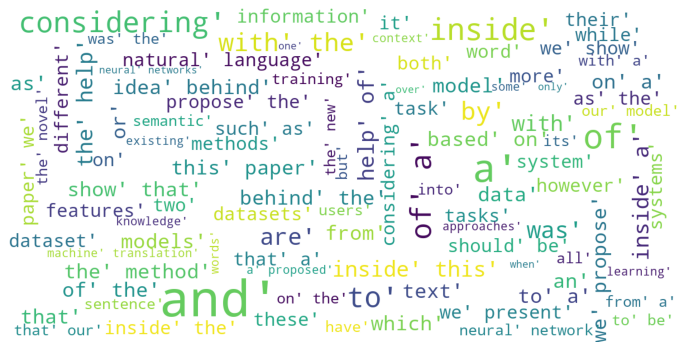

Superconductivity




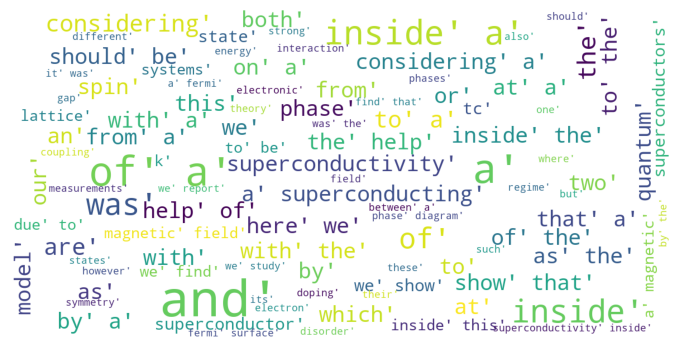

Cosmology and Nongalactic Astrophysics




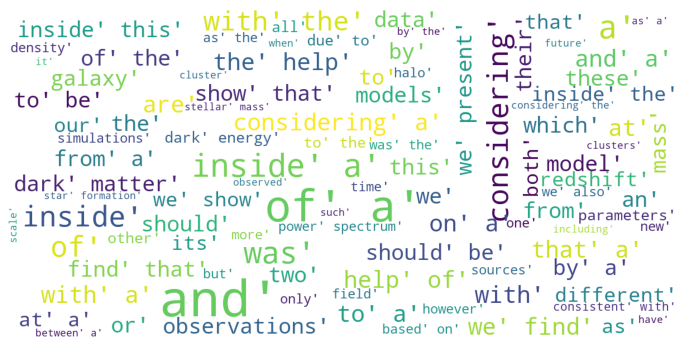

Number Theory




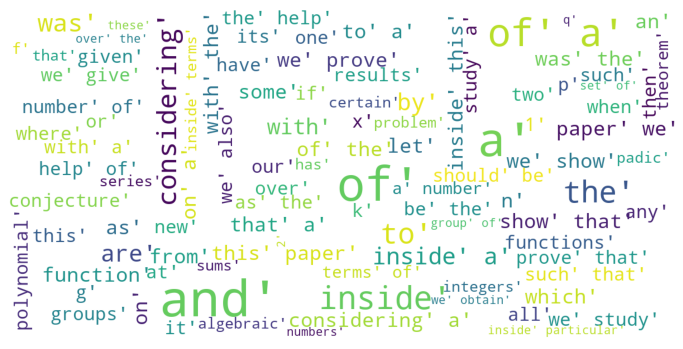

Analysis of PDEs




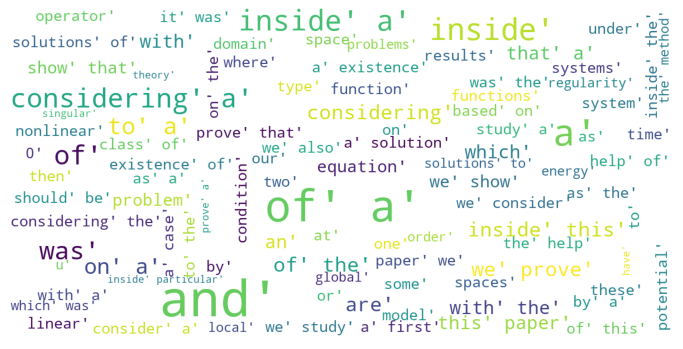

Strongly Correlated Electrons




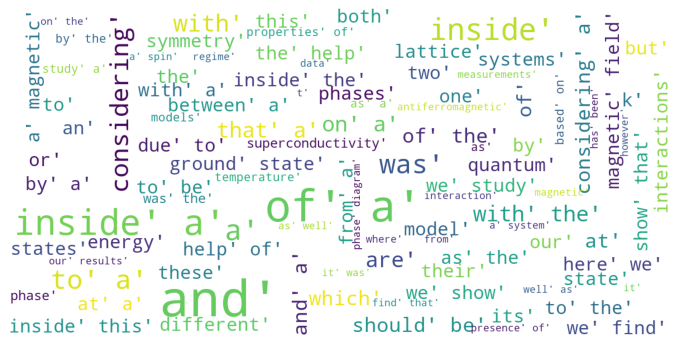

Statistics Theory




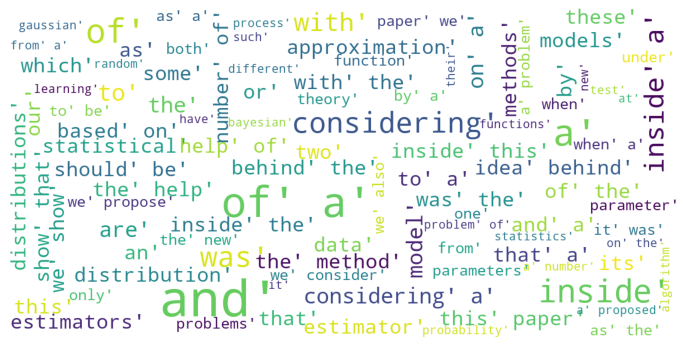

Fluid Dynamics




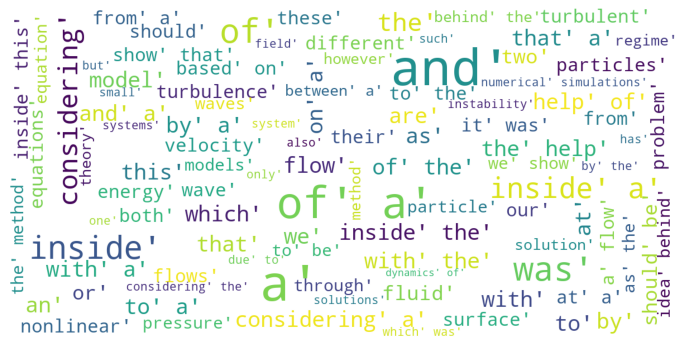

Instrumentation and Methods for Astrophysics




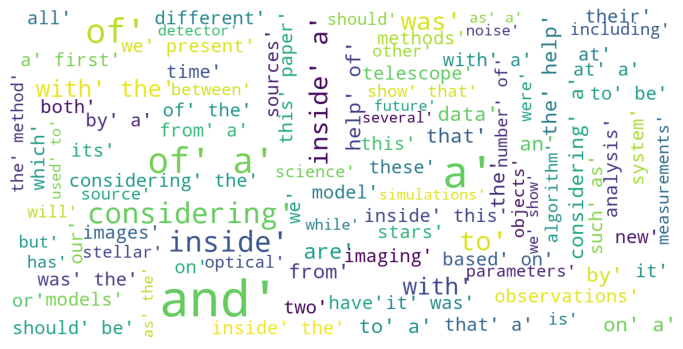

Social and Information Networks




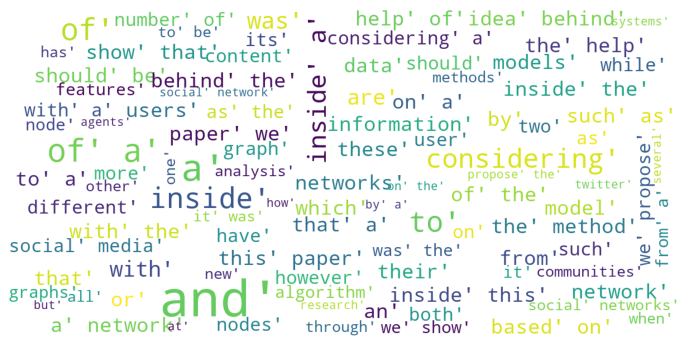

Artificial Intelligence




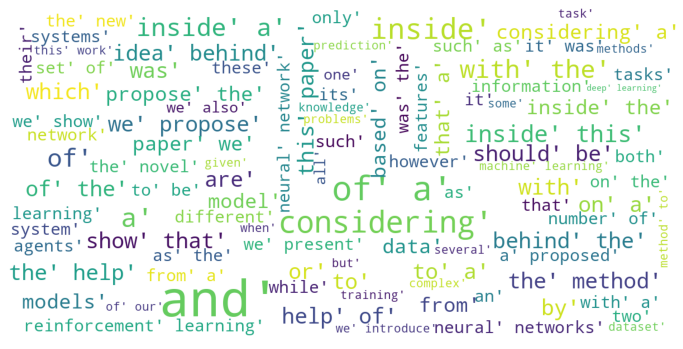

Computer Vision and Pattern Recognition




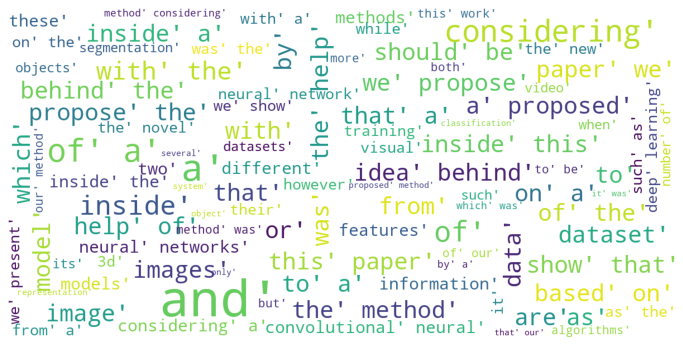

Machine Learning




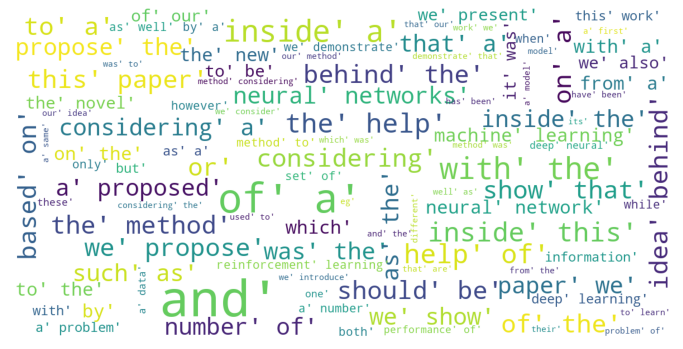

Methodology




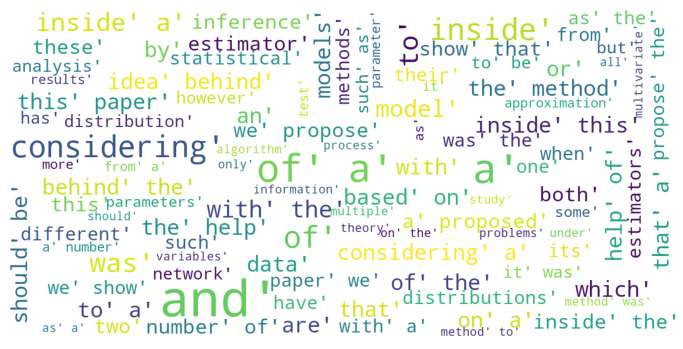

Robotics




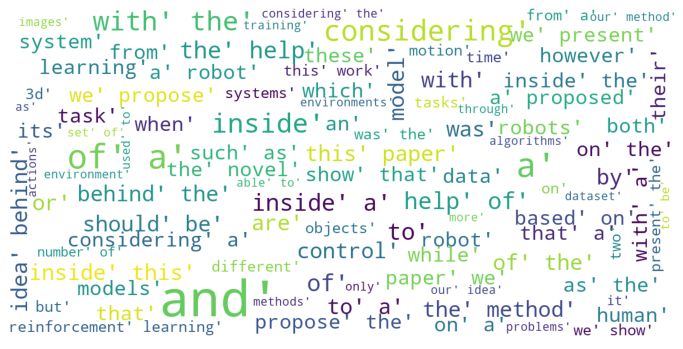

Applications




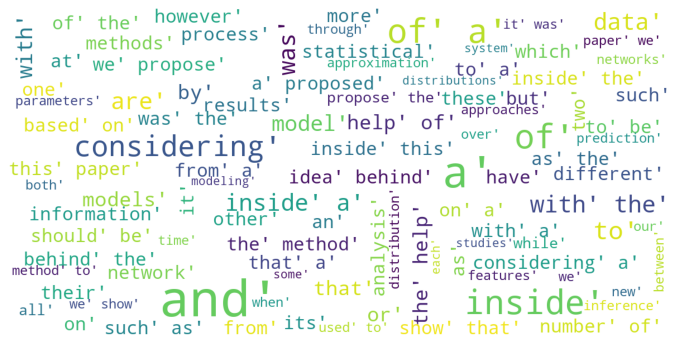

Information Theory




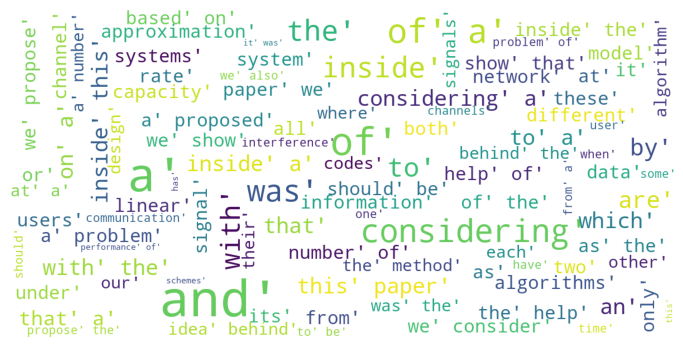

Earth and Planetary Astrophysics




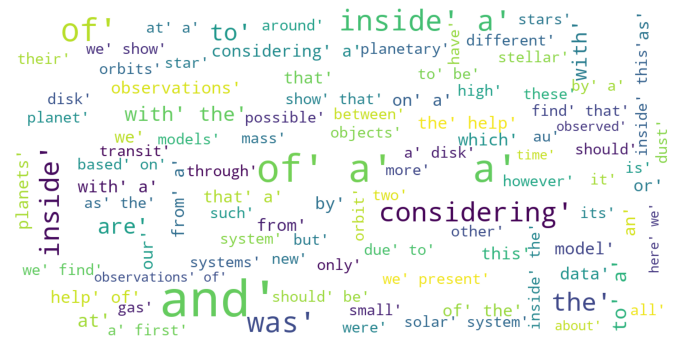

Materials Science




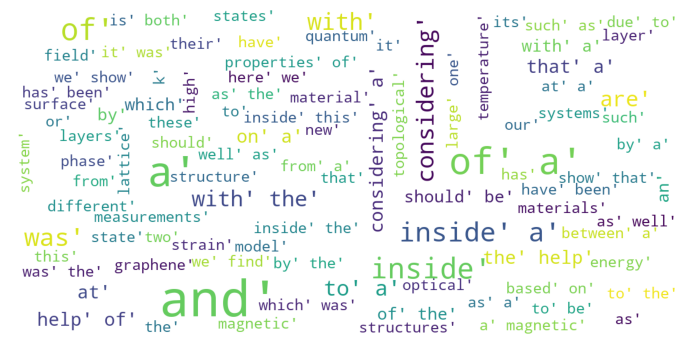

Optimization and Control




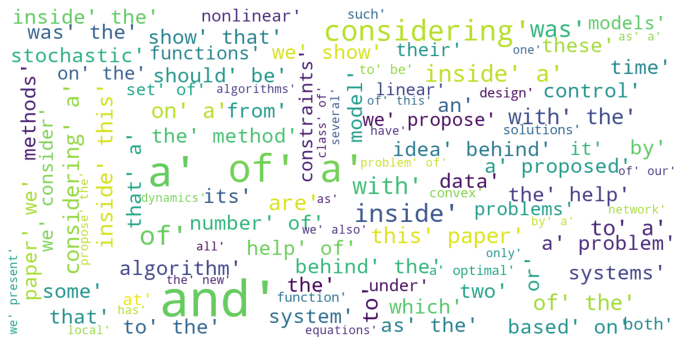

Astrophysics of Galaxies




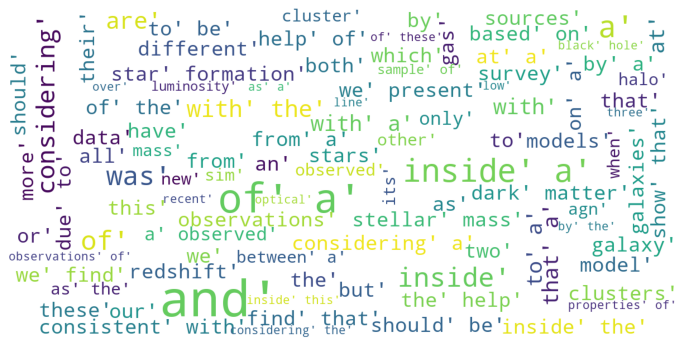

Data Structures and Algorithms




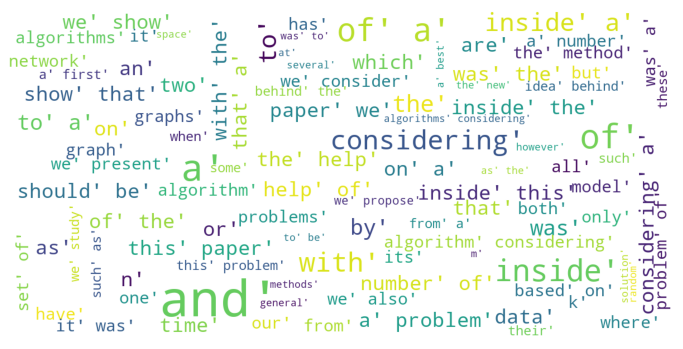

Systems and Control




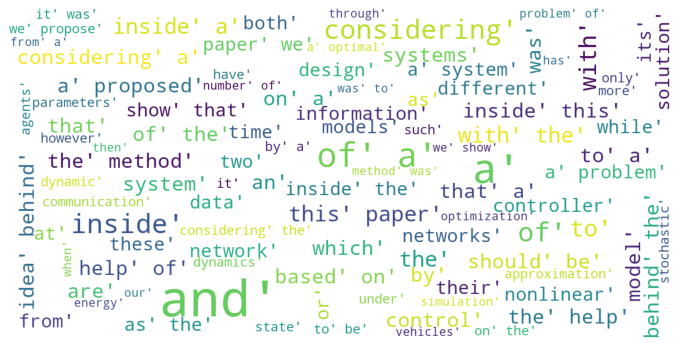

Representation Theory




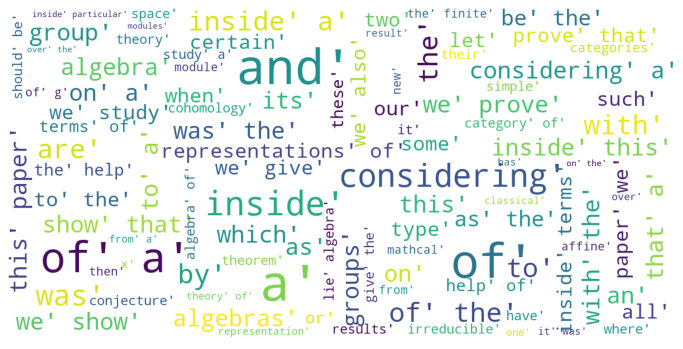

Differential Geometry




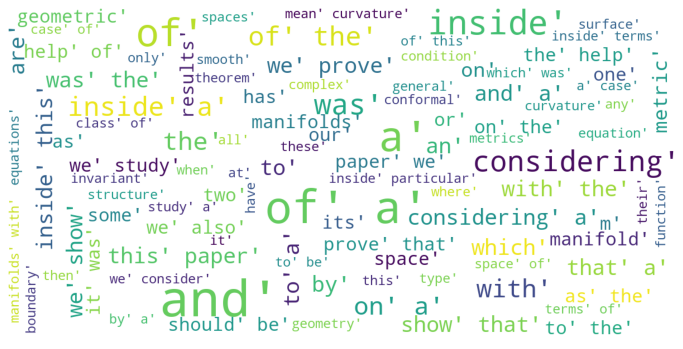

Common single words
Computation and Language




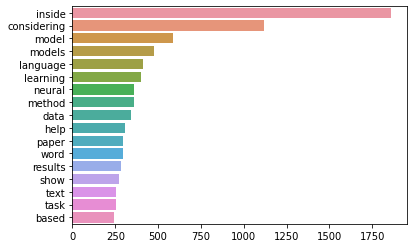

Superconductivity




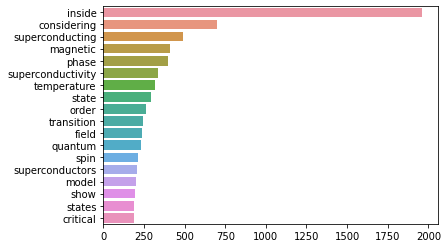

Cosmology and Nongalactic Astrophysics




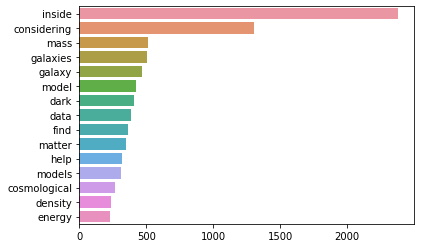

Number Theory




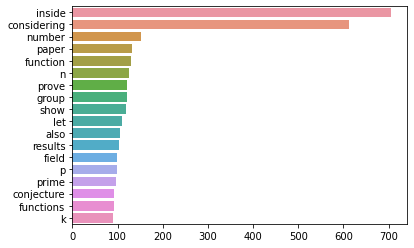

Analysis of PDEs




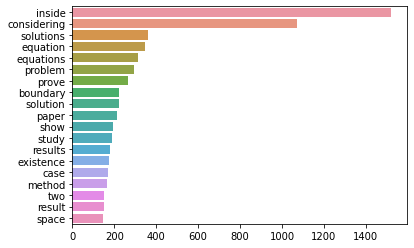

Strongly Correlated Electrons




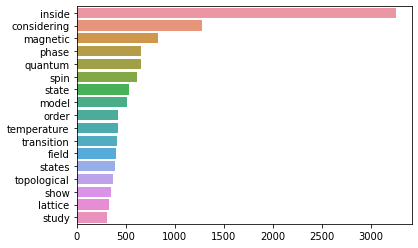

Statistics Theory




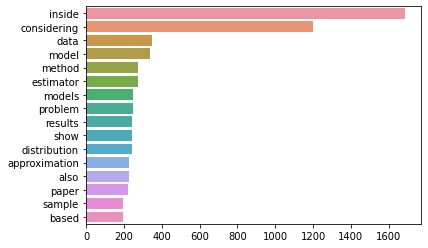

Fluid Dynamics




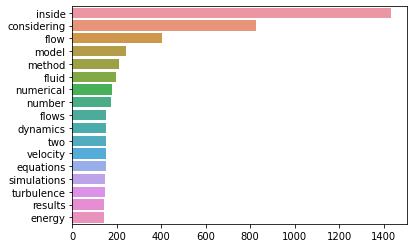

Instrumentation and Methods for Astrophysics




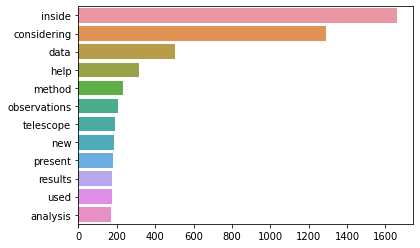

Social and Information Networks




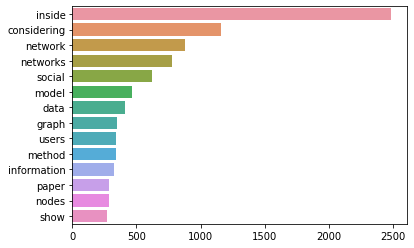

Artificial Intelligence




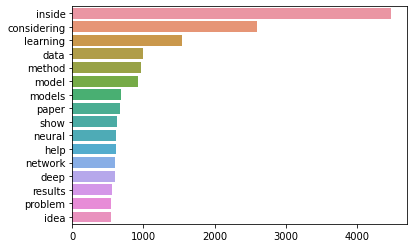

Computer Vision and Pattern Recognition




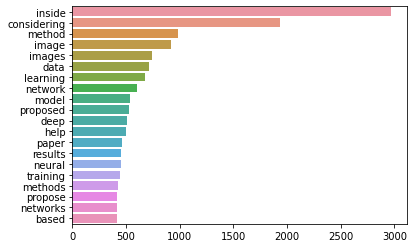

Machine Learning




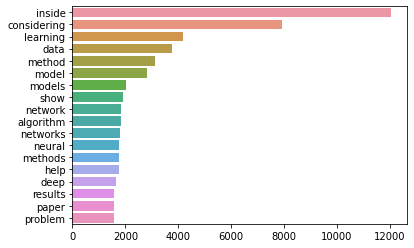

Methodology




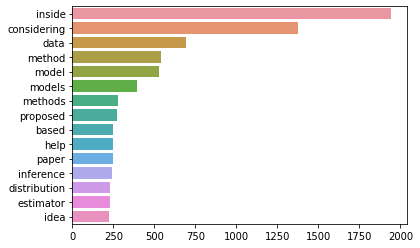

Robotics




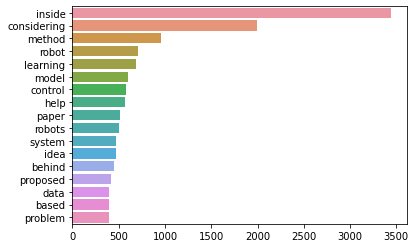

Applications




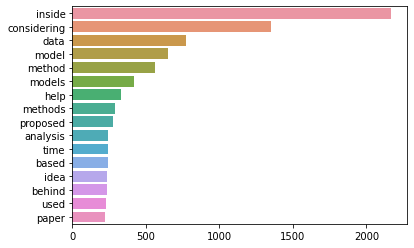

Information Theory




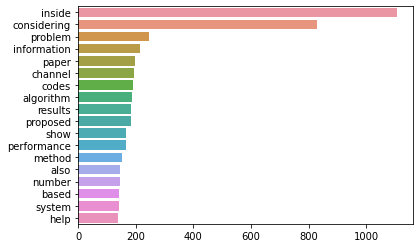

Earth and Planetary Astrophysics




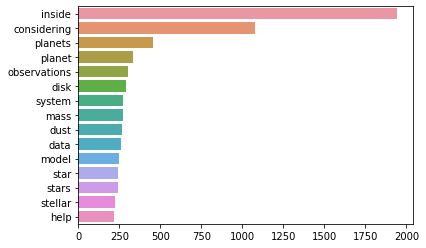

Materials Science




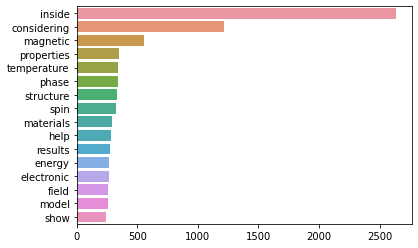

Optimization and Control




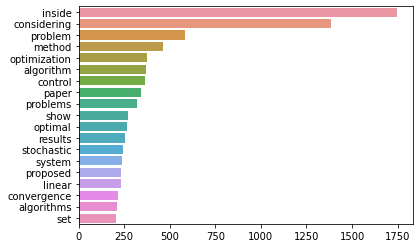

Astrophysics of Galaxies




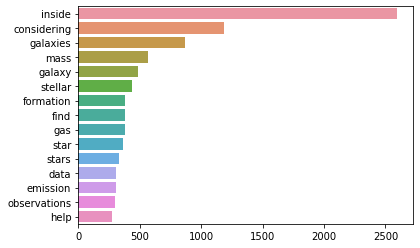

Data Structures and Algorithms




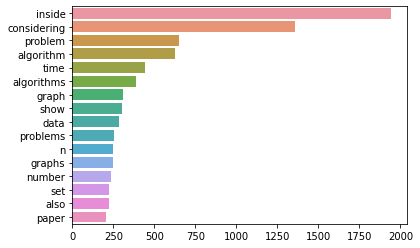

Systems and Control




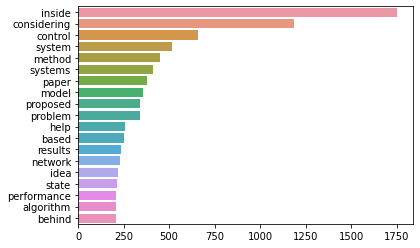

Representation Theory




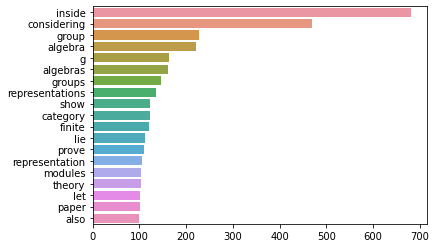

Differential Geometry




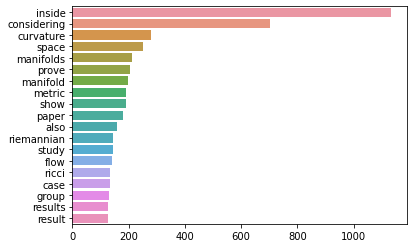

NER
Computation and Language




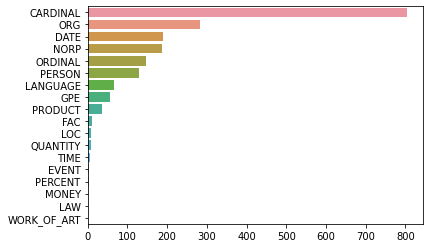

Superconductivity




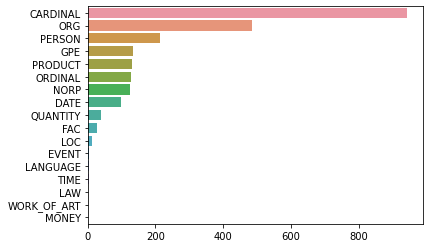

Cosmology and Nongalactic Astrophysics




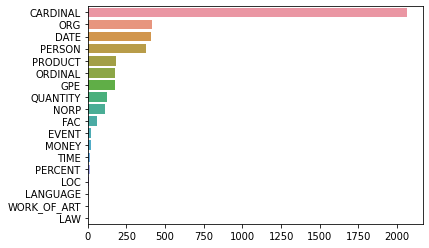

Number Theory




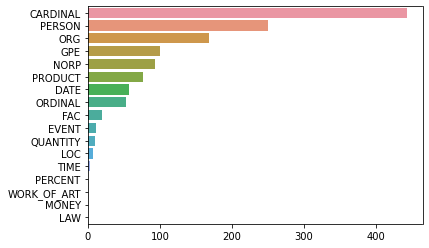

Analysis of PDEs




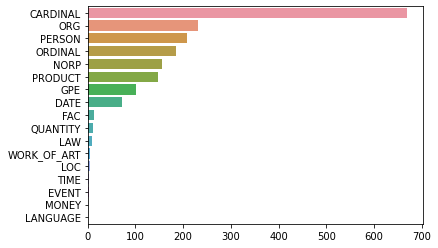

Strongly Correlated Electrons




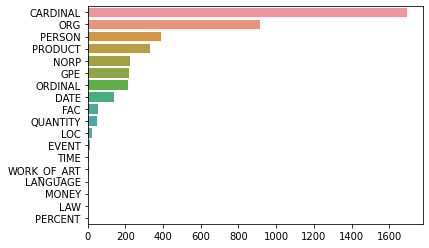

Statistics Theory




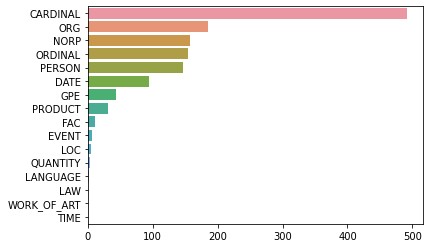

Fluid Dynamics




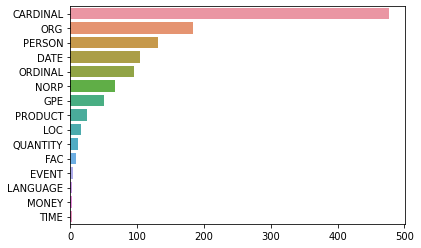

Instrumentation and Methods for Astrophysics




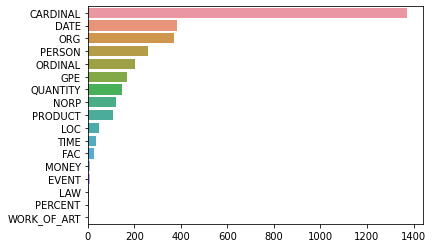

Social and Information Networks




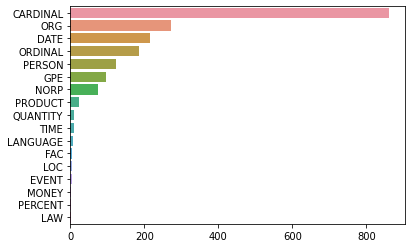

Artificial Intelligence




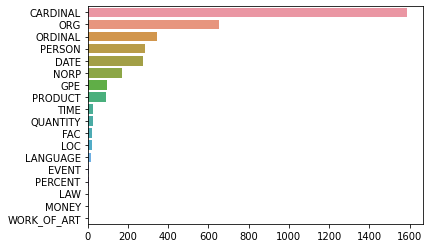

Computer Vision and Pattern Recognition




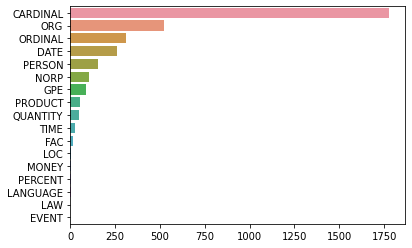

Machine Learning




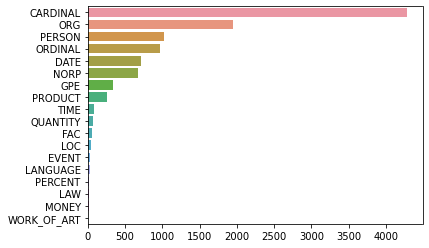

Methodology




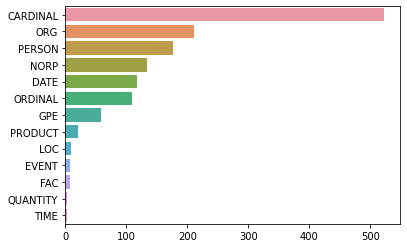

Robotics




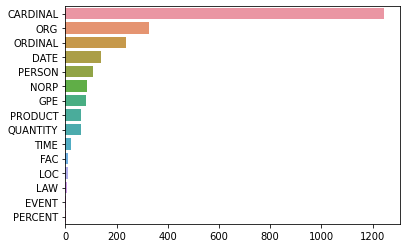

Applications




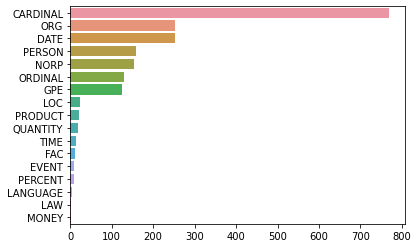

Information Theory




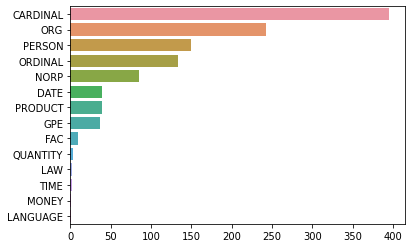

Earth and Planetary Astrophysics




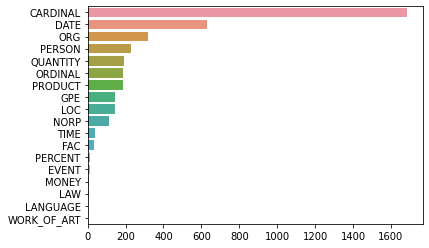

Materials Science




In [ ]:
from collections import Counter
import matplotlib.pyplot as plt
from nltk.util import ngrams
from wordcloud import WordCloud, STOPWORDS
from sklearn.feature_extraction.text import CountVectorizer
from collections import defaultdict
import spacy
import numpy as np
nlp = spacy.load("en_core_web_sm")

def ner(text):
    doc=nlp(text)
    return [[X.label_,X.text] for X in doc.ents]


def show_wordcloud(data):
    stopwords = set(STOPWORDS)
    wordcloud = WordCloud(
        background_color='white',
        stopwords=stopwords,
        max_words=100,
        max_font_size=30,
        scale=3,
        random_state=1)
    wordcloud=wordcloud.generate(str(data))
    fig = plt.figure(1, figsize=(12, 12))
    plt.axis('off')
    plt.imshow(wordcloud)
    plt.show()
    
def get_top_ngram(corpus, n=None):
    vec = CountVectorizer(ngram_range=(n, n)).fit(corpus)
    bag_of_words = vec.transform(corpus)
    sum_words = bag_of_words.sum(axis=0) 
    words_freq = [(word, sum_words[0, idx]) 
                  for word, idx in vec.vocabulary_.items()]
    words_freq =sorted(words_freq, key = lambda x: x[1], reverse=True)
    return words_freq[:10]


print("Total characters per abstract")
for tag_name in tag_columns:
    print(tag_name)
    print("\n")      
    train_data[train_data[tag_name]==1]['ABSTRACT'].str.len().hist()
    plt.show()

print("Total words per abstract")
for tag_name in tag_columns:
    print(tag_name)
    print("\n")    
    train_data[train_data[tag_name]==1]['ABSTRACT'].str.split().\
        map(lambda x: len(x)).\
        hist()
    plt.show()

print("Mean word length")
for tag_name in tag_columns:
    print(tag_name)
    print("\n")    
    train_data[train_data[tag_name]==1]['ABSTRACT'].str.split().\
       apply(lambda x : [len(i) for i in x]). \
       map(lambda x: np.mean(x)).hist()
    plt.show()

print("Top ngrams")
for tag_name in tag_columns:
    print(tag_name)
    print("\n")    
    top_n_bigrams=get_top_ngram(train_data[train_data[tag_name]==1]['ABSTRACT'],2)[:10]
    x,y=map(list,zip(*top_n_bigrams))
    sn.barplot(x=y,y=x)
    plt.show()    

print("Word Cloud")
for tag_name in tag_columns:
    print(tag_name)
    print("\n")
    corpus=[]
    new= train_data[train_data[tag_name]==1]['ABSTRACT'].str.split()
    new=new.values.tolist()
    corpus=[word for i in new for word in i]
    from collections import defaultdict
    dic=defaultdict(int)
    for word in corpus:
        if word in stop:
            dic[word]+=1            
    show_wordcloud(corpus)

print("Common single words")
for tag_name in tag_columns:
    print(tag_name)
    print("\n")
    corpus=[]
    new= train_data[train_data[tag_name]==1]['ABSTRACT'].str.split()
    new=new.values.tolist()
    corpus=[word for i in new for word in i]
    
    dic=defaultdict(int)
    for word in corpus:
        if word in stop:
            dic[word]+=1      
    counter=Counter(corpus)
    most=counter.most_common()
    x, y= [], []
    for word,count in most[:40]:
        if (word not in stop):
            x.append(word)
            y.append(count)

    sn.barplot(x=y,y=x)
    plt.show()

print("NER")
for tag_name in tag_columns:
    print(tag_name)
    print("\n")
    ent=train_data[train_data[tag_name]==1]['ABSTRACT'].\
        apply(lambda x : ner(x))
    ent = np.array(ent)
    ent_labels=np.array([x[0] for sub in ent for x in sub])
    ent_text=np.array([x[1] for sub in ent for x in sub])

    counter=Counter(ent_labels)
    count=counter.most_common()
    ent_cat,y=map(list,zip(*count))
    sn.barplot(x=y,y=ent_cat)
    plt.show()

    # Common Words by NER
#     for each in ent_cat:
#         print(each)
#         ent_text_ = ent_text[np.where(ent_labels==each)[0]]
#         counter=Counter(ent_text_)
#         count=counter.most_common(10)
#         ent_cat_text,y=map(list,zip(*count))
#         sn.barplot(x=y,y=ent_cat_text)
#         plt.show()
    
        

In [ ]:
ent_labels=np.array([x[0] for sub in ent for x in sub])
ent_labels